# Realização da conexão do Google Drive com o ambiente de execução do Colab através da importação da biblioteca drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importação das bibliotecas numpy (para trabalhar com cálculos núméricos e matrizes),  pandas (para análise e manipulação de dados) e os (para interagir com o sistema operacional)

In [ ]:
import pandas as pd
import os

# Carregamento e leitura de dois arquivos CSV (treino e teste), exibição do número de linhas e colunas de cada um dos arquivos e visualização do nomes das colunas do arquivo de treino

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/playground-series-s5e9/train.csv')
test = pd.read_csv('/content/drive/MyDrive/playground-series-s5e9/test.csv')

print("Total de registros com características para treino: ", train.shape)
print("Total de registros com características para teste.: ", test.shape)
print("\nColunas: ", train.columns.tolist())

Total de registros com características para treino:  (524164, 11)
Total de registros com características para teste.:  (174722, 10)

Colunas:  ['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality', 'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy', 'BeatsPerMinute']


# Identificação de valores nulos em cada coluna dos arquivos de treino e teste e exibição do tipo de dado de cada coluna do arquivo de treino

In [ ]:
# Tratamento de valores nulos
print("Valores nulos (treino): ")
print(train.isna().sum())
print("\nValores nulos (teste): ")
print(test.isna().sum())

# Verificação tipos de dados
print("\nTipos (treino):")
print(train.dtypes)

Valores nulos (treino): 
id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

Valores nulos (teste): 
id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

Tipos (treino):
id                             int64
RhythmScore                  float64
AudioLoudness                float64
VocalContent                 float64
AcousticQuality              float64
InstrumentalScore            float64
Liv

# Análise estatística dos dados do arquivos de treino e teste

In [ ]:
# Análise dos dados de treino
print("Descrição treino: ")
print(train.describe())

# Análise dos dados de teste
print("\nDescrição teste: ")
print(test.describe())

Descrição treino: 
                  id    RhythmScore  AudioLoudness   VocalContent  \
count  524164.000000  524164.000000  524164.000000  524164.000000   
mean   262081.500000       0.632843      -8.379014       0.074443   
std    151313.257586       0.156899       4.616221       0.049939   
min         0.000000       0.076900     -27.509725       0.023500   
25%    131040.750000       0.515850     -11.551933       0.023500   
50%    262081.500000       0.634686      -8.252499       0.066425   
75%    393122.250000       0.739179      -4.912298       0.107343   
max    524163.000000       0.975000      -1.357000       0.256401   

       AcousticQuality  InstrumentalScore  LivePerformanceLikelihood  \
count    524164.000000      524164.000000              524164.000000   
mean          0.262913           0.117690                   0.178398   
std           0.223120           0.131845                   0.118186   
min           0.000005           0.000001                   0.024300   

# Importação das bibliotecas matplotlib.pyplot e seaborn para a criação de um histograma para a coluna BeatsPerMinute do arquivo de treino

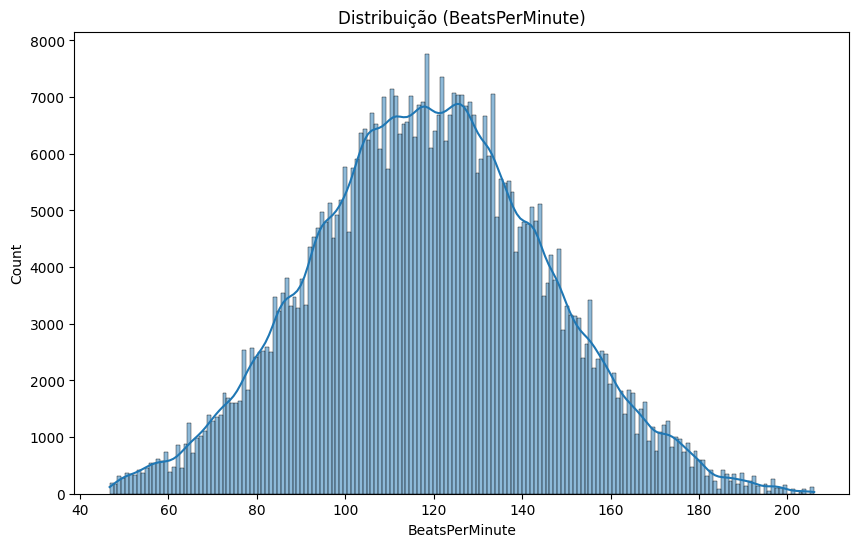

In [ ]:
# Importa as bibliotecas matplotlib.pyplot e seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Monta o gráfico de distribuição
plt.figure(figsize=(10, 6))
sns.histplot(train['BeatsPerMinute'], kde=True)
plt.title('Distribuição (BeatsPerMinute)')
plt.show()

# Criação de novas colunas derivadas das existentes através da função feature_engineering, aplicação das funções nos arquivos de treino e teste gerando novos DataFrame (train_fe e test_fe) e exibição do total de linhas e colunas dos novos DataFrame

In [ ]:
# Extração de dados (feature engineering)
def feature_engineering(df):
    df = df.copy()

    df['Rhythm_Energy'] = df['RhythmScore'] * df['Energy']
    df['Rhythm_Loudness'] = df['RhythmScore'] * df['AudioLoudness']
    df['Duration_Minutes'] = df['TrackDurationMs'] / 60000
    df['Duration_Energy_Ratio'] = df['TrackDurationMs'] / (df['Energy'] * 10000 + 1)
    df['RhythmScore_Squared'] = df['RhythmScore'] ** 2
    df['Energy_Squared'] = df['Energy'] ** 2
    df['Log_Duration'] = np.log1p(df['TrackDurationMs'])
    df['Acoustic_Instrumental_Ratio'] = df['AcousticQuality'] / (df['InstrumentalScore'] + 0.01)
    df['Vocal_Energy'] = df['VocalContent'] * df['Energy']
    df['Live_Energy'] = df['LivePerformanceLikelihood'] * df['Energy']
    df['Mood_Rhythm'] = df['MoodScore'] * df['RhythmScore']
    df['Audio_Intensity'] = (df['Energy'] * np.abs(df['AudioLoudness'])) / 10
    df['Performance_Character'] = (df['LivePerformanceLikelihood'] + df['MoodScore']) / 2
    df['Energy_Loudness_Ratio'] = df['Energy'] / (np.abs(df['AudioLoudness']) + 0.01)
    df['Rhythm_Duration_Density'] = df['RhythmScore'] / (df['Duration_Minutes'] + 0.01)

    return df

train_fe = feature_engineering(train)
test_fe = feature_engineering(test)

print("Total de registros com características para treino: ", train_fe.shape)
print("Total de registros com características para teste.: ", test_fe.shape)

Total de registros com características para treino:  (524164, 26)
Total de registros com características para teste.:  (174722, 25)


# Comparação do DataFrame original (train) com o transformado (train_fe) para o descrobimento e quantificação de novas colunas criadas pela função de feature engineering.

In [ ]:
# Verificação dos dados
original_cols = set(train.columns)
new_cols = [col for col in train_fe.columns if col not in original_cols]
print("Novas características: ", new_cols)
print("Quant. de novas características: ", len(new_cols))

Novas características:  ['Rhythm_Energy', 'Rhythm_Loudness', 'Duration_Minutes', 'Duration_Energy_Ratio', 'RhythmScore_Squared', 'Energy_Squared', 'Log_Duration', 'Acoustic_Instrumental_Ratio', 'Vocal_Energy', 'Live_Energy', 'Mood_Rhythm', 'Audio_Intensity', 'Performance_Character', 'Energy_Loudness_Ratio', 'Rhythm_Duration_Density']
Quant. de novas características:  15


# Importação de várias bibliotecas de sklearn (para análise preditiva de dados e modelagem estatísticas) e da biblioteca lightgbm (para classificação e regressao baseadas em árvores de decisão)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# Separação das colunas de entrada e rótulo no conjunto de treino, remoção de colunas desnecessárias no conjunto de teste e exibição do tamanho total dos conjuntos de treino e teste

In [ ]:
# Separa os rótulos
X_train = train_fe.drop(['id', 'BeatsPerMinute'], axis=1)
y_train = train_fe['BeatsPerMinute']
test_ids = test_fe['id']
test_fe = test_fe.drop(['id', 'BeatsPerMinute'], axis=1, errors='ignore')

print("Total de registros com características para treino: ", X_train.shape)
print("Total de registros com rótulos para treino........: ", y_train.shape)
print("Total de registros com características para teste.: ", test_fe.shape)

Total de registros com características para treino:  (524164, 24)
Total de registros com rótulos para treino........:  (524164,)
Total de registros com características para teste.:  (174722, 24)


# Seleção de todas as colunas do conjunto de treino, criação de um transformação e padronização dos dados

In [ ]:
# Pradroniza as variáveis numéricas
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Aplica transformações em colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ]
)

# Criação do modelo LightGBM que realiza a otimização dos hiperparâmetros

In [ ]:
# Modelo LightGBM - otimização dos hiperparâmetros
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=12,  # Profundidade das árvores
    num_leaves=63,  # Número de folhas
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    importance_type='gain'
)

# Criação de pipelines para o processador e o lgb__model

In [ ]:
# Criar pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb_model)
])

# Avaliação do desempenho do modelo com validação cruzada, realização da validação cruzada e exibuição da lista, média e desvio padrão de erros do CV

In [ ]:
# Avaliando o desempenho do modelo com validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realiza a validação cruzada
cv_scores = cross_val_score(pipeline, X_train, y_train,
                          cv=kf,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1)

print("CV MSE Scores:", -cv_scores)
print("CV MSE Média:", -cv_scores.mean())
print("CV MSE Std:", cv_scores.std())

CV MSE Scores: [699.38743157 701.75282652 703.91663699 699.52768251 697.7247359 ]
CV MSE Média: 700.4618626982012
CV MSE Std: 2.1503958212042336


# Treinamento do modelo com os dados de treino

In [ ]:
print("Modelo em treinamento...")
pipeline.fit(X_train, y_train)
print("Treinamento concluído")

Modelo em treinamento...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.251211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 524164, number of used features: 24
[LightGBM] [Info] Start training from score 119.034899
Treinamento concluído


# Visualização da relevância das features, ordenação por prioridade e exibição das 15 features mais relevantes por meio de um gráfico de barras

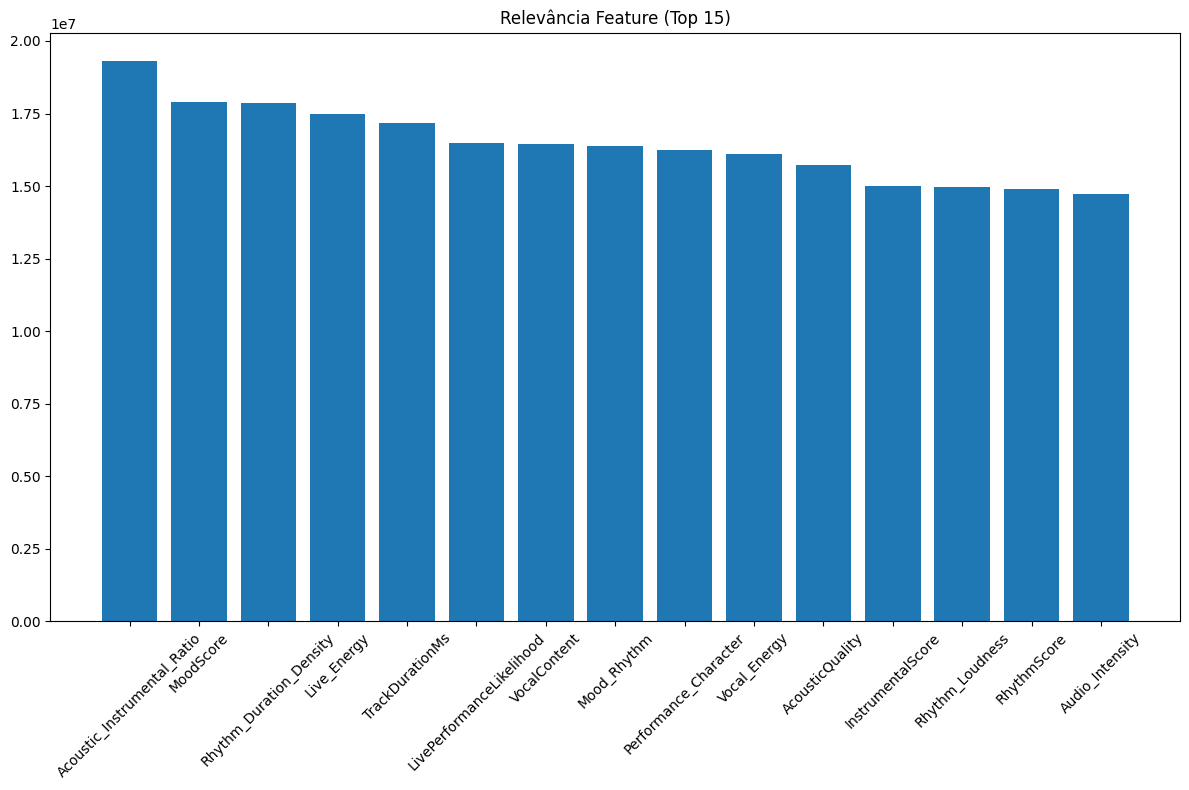

In [ ]:
# Visualização da relevância das features
feature_names = X_train.columns
importances = pipeline.named_steps['model'].feature_importances_

# Ordenação por prioridade
indices = np.argsort(importances)[::-1]

# Mostra as 15 features mais relevantes
plt.figure(figsize=(12, 8))
plt.title("Relevância Feature (Top 15)")
plt.bar(range(15), importances[indices[:15]])
plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=45)
plt.tight_layout()
plt.show()

# Previsões do teste e exibição das estatísticas de previsão

In [ ]:
# Previsões do teste
print("Em andamento...")
test_predictions = pipeline.predict(test_fe)

# Mostra as estatísticas de previsão
print("Estátisticas de previsão: ")
print(f"Min: {test_predictions.min():.2f}")
print(f"Max: {test_predictions.max():.2f}")
print(f"Média: {test_predictions.mean():.2f}")
print(f"Std: {test_predictions.std():.2f}")

Em andamento...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Estátisticas de previsão: 
Min: 106.48
Max: 132.32
Média: 119.04
Std: 0.94


# Criação de um arquivo de submissão do desafio, Pré visualização dos dados e salvamento DO arquivo .CSV

In [ ]:
# Arquivo de submissão do desafio
submission = pd.DataFrame({
    'id': test_ids,
    'BeatsPerMinute': test_predictions
})

# Mostra uma pré visualização dos dados
print("Pré-visualização: ")
print(submission.head())
print(f"\nQuantidade final: {submission.shape}")

# Salva em um arquivo .CSV
submission.to_csv('submission.csv', index=False)

Pré-visualização: 
       id  BeatsPerMinute
0  524164      118.961126
1  524165      117.983442
2  524166      119.758696
3  524167      119.240525
4  524168      119.652283

Quantidade final: (174722, 2)
